In [5]:
#Lan Jin

'''
The Google Colab link for CNN model is: https://colab.research.google.com/drive/1iv7WFsqMX9SASDNnGordLPn26rPWMxbh?usp=sharing

'''
!git clone https://github.com/nicholas-mclaughlin/CPSC599GroupProject.git

!ls


fatal: destination path 'CPSC599GroupProject' already exists and is not an empty directory.
CPSC599GroupProject  drive  sample_data


In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline


**Import Database**

In [7]:
img_rows, img_cols = 28, 28

import os
data_dir = os.path.join(cwd, "..", "/content/CPSC599GroupProject/data_reduced")
FILES = os.listdir(data_dir)
print(FILES)

FILES = os.listdir(data_dir)
FILES = [x for x in FILES if x.endswith('.npy')]
FILES = sorted(FILES)
FILES = FILES[0:10]

LABELS = [file.replace(".npy", "") for file in FILES]
LABELS = [label.replace("full_numpy_bitmap_", "") for label in LABELS]

num_classes = len(LABELS)
print(FILES)
print(LABELS)
print(num_classes)

['aircraft carrier.npy', 'animal migration.npy', 'airplane.npy', 'ant.npy', 'angel.npy', 'ambulance.npy', 'The Great Wall of China.npy', 'alarm clock.npy', 'The Eiffel Tower.npy', 'The Mona Lisa.npy']
['The Eiffel Tower.npy', 'The Great Wall of China.npy', 'The Mona Lisa.npy', 'aircraft carrier.npy', 'airplane.npy', 'alarm clock.npy', 'ambulance.npy', 'angel.npy', 'animal migration.npy', 'ant.npy']
['The Eiffel Tower', 'The Great Wall of China', 'The Mona Lisa', 'aircraft carrier', 'airplane', 'alarm clock', 'ambulance', 'angel', 'animal migration', 'ant']
10


**Part I - Data Preprocessing**

In [15]:
# Dataset with where each entry is label concatenated with flattened numpy image
data = np.array([]).reshape(0, img_rows * img_cols)
target = np.array([]).reshape(0, 1)
  
i = 0
for numpy_file in FILES:
    print("--> Loading the numpy file: {}".format(numpy_file))
    # Load numpy file
    data_i = np.load(os.path.join(data_dir, numpy_file))
    # Create array of labels based on the class and number of samples in the file
    data_num_samples = len(data_i)
    target_i = np.ones(data_num_samples, dtype=int) * i
    target_i = target_i[:, np.newaxis]

    data = np.append(data, data_i[:3000], axis=0)
    target = np.append(target, target_i[:3000], axis=0)

    i += 1
    print("Current data array shape: {}".format(data.shape))
    print("Current target array shape: {}".format(target.shape))

# np.random.shuffle(dataset)
# dataset_len = len(dataset)

print("_________________________")
print("Final data array shape: {}".format(data.shape))
print("Final target array shape: {}".format(target.shape))

--> Loading the numpy file: The Eiffel Tower.npy
Current data array shape: (3000, 784)
Current target array shape: (3000, 1)
--> Loading the numpy file: The Great Wall of China.npy
Current data array shape: (6000, 784)
Current target array shape: (6000, 1)
--> Loading the numpy file: The Mona Lisa.npy
Current data array shape: (9000, 784)
Current target array shape: (9000, 1)
--> Loading the numpy file: aircraft carrier.npy
Current data array shape: (12000, 784)
Current target array shape: (12000, 1)
--> Loading the numpy file: airplane.npy
Current data array shape: (15000, 784)
Current target array shape: (15000, 1)
--> Loading the numpy file: alarm clock.npy
Current data array shape: (18000, 784)
Current target array shape: (18000, 1)
--> Loading the numpy file: ambulance.npy
Current data array shape: (21000, 784)
Current target array shape: (21000, 1)
--> Loading the numpy file: angel.npy
Current data array shape: (24000, 784)
Current target array shape: (24000, 1)
--> Loading the n

In [16]:
from sklearn.model_selection import train_test_split

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(data, target, stratify=target, test_size=0.20, random_state=0)

print("Train Length: {} images".format(len(x_train)))
print("Test Length: {} images".format(len(x_test)))


Train Length: 24000 images
Test Length: 6000 images


**Plotting the processed images**

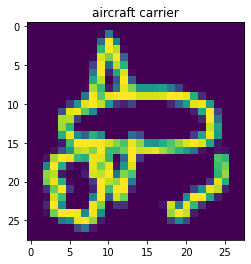

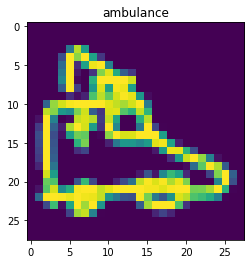

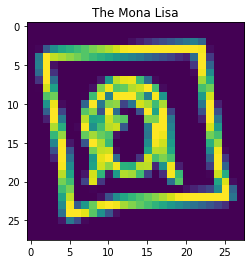

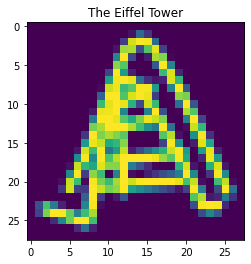

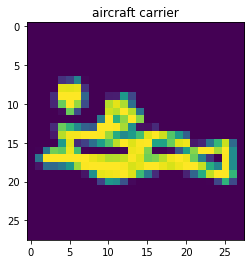

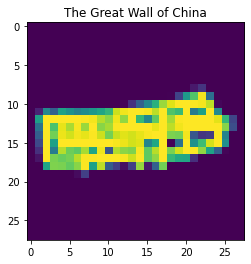

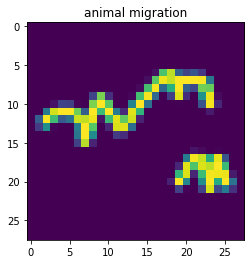

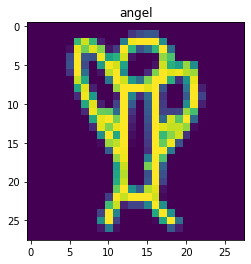

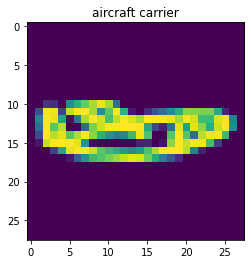

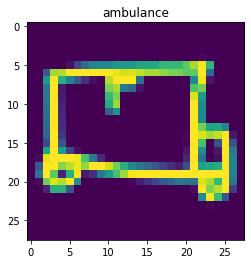

In [17]:
for i in range(10):
    plt.imshow(x_train[i].reshape(28,28))
    plt.title(LABELS[(int)(y_train[i])])
    
    plt.show()

In [18]:

import keras


# Normalize image data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Reshape images to 28x28x1
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

# Switch labels to onehot encoding
y_train_onehot = keras.utils.to_categorical(y_train, num_classes)
y_test_onehot = keras.utils.to_categorical(y_test, num_classes)

print("Train Sample Shape: {}".format(x_train.shape))
print("Train Label Shape: {}".format(y_train_onehot.shape))


Train Sample Shape: (24000, 28, 28, 1)
Train Label Shape: (24000, 10)


**Part 2 - Building the CNN**

In [ ]:


# Initialising the CNN
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[28, 28, 1]))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
# Maxpool
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a thrid convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
# Maxpool
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))


# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=256, activation='relu'))
#cnn.add(tf.keras.layers.Dropout(0.5, input_shape=(2,)))

# Step 5 - Output Layer
cnn.add(tf.keras.layers.Dense(10, activation='sigmoid'))
#cnn.add(tf.keras.layers.Dense(10, activation='softmax'))

# Part 3 - Training the CNN

# Compiling the CNN
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Training the CNN on the Training set and evaluating it on the Test set
history = cnn.fit(x_train, y_train_onehot, epochs = 20)

print(cnn.summary())

# Print the validation result
_, accuracy = cnn.evaluate(x_test, y_test_onehot, verbose=1)
print("Accuracy on test set: {:.3f}".format(accuracy))



Epoch 1/20
750/750 [==============================] - 19s 24ms/step - loss: 0.3027 - accuracy: 0.3338
Epoch 2/20
750/750 [==============================] - 18s 24ms/step - loss: 0.1476 - accuracy: 0.7010
Epoch 3/20
750/750 [==============================] - 18s 24ms/step - loss: 0.1246 - accuracy: 0.7538
Epoch 4/20
750/750 [==============================] - 18s 24ms/step - loss: 0.1106 - accuracy: 0.7846
Epoch 5/20
750/750 [==============================] - 18s 24ms/step - loss: 0.0980 - accuracy: 0.8092
Epoch 6/20
750/750 [==============================] - 18s 24ms/step - loss: 0.0900 - accuracy: 0.8281
Epoch 7/20
750/750 [==============================] - 18s 24ms/step - loss: 0.0843 - accuracy: 0.8372
Epoch 8/20
750/750 [==============================] - 17s 23ms/step - loss: 0.0807 - accuracy: 0.8436
Epoch 9/20
750/750 [==============================] - 18s 24ms/step - loss: 0.0759 - accuracy: 0.8528
Epoch 10/20
750/750 [==============================] - 18s 24ms/step - loss: 0.074

**Save the model to Google Colab for future test**

In [ ]:
from keras.models import load_model

cnn.save('cnn-model.h5')

**Testing a single image on Google colab **bold text**

In [ ]:

import glob
from keras.preprocessing import image
cwd = os.getcwd()
for model in glob.glob(cwd + '/*.h5'):
  reconstructed_model = keras.models.load_model(model)
  print("////////////////////////////")
  print("model: " , model)
  for file in glob.glob(cwd + '/*.jpg'):

    test_image = Image.open(file)


    img2 = test_image.convert("L")


    arr = np.array(img2)
    arr2 = np.reshape(arr, (1,28,28,1))
    arr2 = arr2 / 255

    pred = reconstructed_model.predict(arr2)
    i = y_train[np.argmax(pred)]
    index = (int)(i[0])
    #print(file)
    print(file, LABELS[index])




'\nimport glob\nfrom keras.preprocessing import image\ncwd = os.getcwd()\nfor model in glob.glob(cwd + \'/*.h5\'):\n  reconstructed_model = keras.models.load_model(model)\n  print("////////////////////////////")\n  print("model: " , model)\n  for file in glob.glob(cwd + \'/*.jpg\'):\n\n    test_image = Image.open(file)\n\n\n    img2 = test_image.convert("L")\n\n\n    arr = np.array(img2)\n    arr2 = np.reshape(arr, (1,28,28,1))\n    arr2 = arr2 / 255\n\n    pred = reconstructed_model.predict(arr2)\n    i = y_train[np.argmax(pred)]\n    index = (int)(i[0])\n    #print(file)\n    print(file, LABELS[index])\n\n'